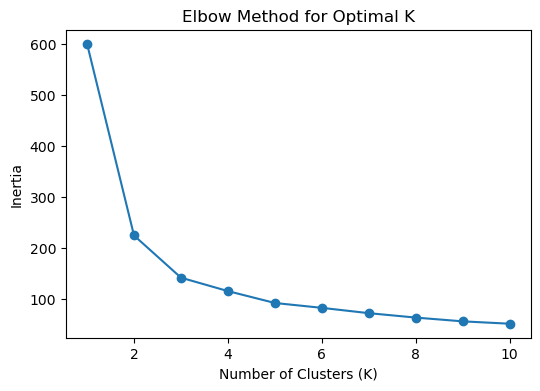

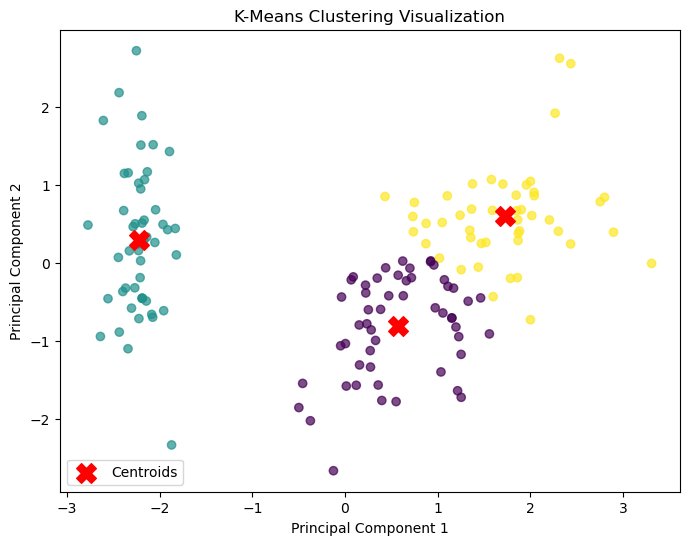

                 Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
Cluster                                                                         
0         90.566038       5.801887      2.673585       4.369811      1.413208   
1         25.500000       5.006000      3.418000       1.464000      0.244000   
2        111.702128       6.780851      3.095745       5.510638      1.972340   

         Cluster  
Cluster           
0            0.0  
1            1.0  
2            2.0  
Clustered data saved as Iris_Clustered.csv


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Load dataset
file_path = r"C:\Users\vatch\Downloads\archive (6)\Iris.csv"
df = pd.read_csv(file_path)

# Drop non-numeric columns (e.g., Species)
X = df.drop(columns=["Id", "Species"], errors='ignore')

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find optimal K using Elbow Method
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Apply K-Means with optimal K (assumed K=3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataset
df['Cluster'] = clusters

# Apply PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1], 
            s=200, c='red', marker='X', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Visualization')
plt.legend()
plt.show()

# Display cluster statistics (fixing TypeError issue)
numeric_columns = df.select_dtypes(include=[np.number]).columns
print(df.groupby('Cluster')[numeric_columns].mean())

# Save clustered dataset
df.to_csv("Iris_Clustered.csv", index=False)
print("Clustered data saved as Iris_Clustered.csv")